In [33]:
from openpyxl import load_workbook
#import openpyxl
import csv
import os

from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker

import sys
sys.path.append("/Users/szagar/ZTS/Dropbox/Business/ats/Code/Model/v3")
from base import Base,Session

from oos_test import OosTest

import pandas as pd

In [34]:

dbox = '/Users/szagar/ZTS/Dropbox/'
msa_dir = dbox + 'Business/ats/Data/MSA/StrategyTrades/'
ws_dir = f'{dbox}Business/ats/Data/Queue/OosResults'

In [35]:
def parse_performance_summary(wb):
    sql_updates = {}
    ws = wb['Performance Summary']

    # fields of interest
    foi = ['Total Net Profit','Avg Trade Net Profit','Profit Factor','Total Number of Trades',
                 'Percent Profitable','Avg Winning Trade','Avg Losing Trade',
                 'Sharpe Ratio','Total Commission','Total Slippage',]
    db_map = {'Total Net Profit': 'net_profit',
              'Avg Trade Net Profit': 'avg_trade',
              'Profit Factor': 'profit_factor',
              'Total Number of Trades': 'trade_count',
              'Percent Profitable': 'percent_winners',
              'Avg Winning Trade': 'avg_winner',
              'Avg Losing Trade': 'avg_looser',
              'Sharpe Ratio': 'sharpe_ratio',
              'Total Slippage': 'slippage',
              'Total Commission': 'commission',}
    for row in ws.rows:
        try:
            k = row[0].value  #.title
        except AttributeError:
            continue
        if k is None: continue
        #k = k.replace(" ","")
        #k = k.replace(".","")
        #k = k.replace(":","")
        #if k.replace(" ","") == "": continue
        if k == 'All Trades': break
        
        print(f'{k}')
        if k in foi:
            sql_updates[db_map[k]] = row[1].value
    return(sql_updates)

In [36]:
def parse_trades_list(wb):
    ws = wb['Trades List']
    fn = f'test_{tn}'
    with open(msa_dir + fn +'.csv', 'w') as f:
        c = csv.writer(f)
        for row in ws.rows:
            #print([cell.value for cell in row])
            c.writerow([cell.value for cell in row])

    
    wb.close()


In [37]:
def parse_monthly(wb):
    ws = wb['Monthly']
    mdata = False
    mdata_cols = False
    data = []
    data_cols = []
    for row in ws.rows:
        try:
            k = row[0].value  #.title
        except AttributeError:
            continue
        if k is None: 
            continue
        if k == 'Mark-To-Market Rolling Period Analysis:': 
            break
        if mdata:
            data.append([str(cell.value) for cell in row])
        if mdata_cols:
            mdata_cols = False;
            mdata = True
            for r in row:
                data_cols.append(r.value)
        if k == 'Mark-To-Market Period Analysis:': 
            mdata_cols = True
            
    #print(f'data_cols={data_cols}')
    #for d in data:
    #    print(','.join(d))
    df = pd.DataFrame(data,columns=data_cols)
    return(df)
    
'''    
for fn in os.listdir(ws_dir):
    file = ws_dir+'/'+fn
    if fn == '1.xlsx':
        wb = load_workbook(filename=file, read_only=True)
        #print (wb.sheetnames)

        df = parse_monthly(wb)
        df.set_index('Period',inplace=True)
        print(df)
'''        
file = ws_dir+'/'+'1.xlsx'
wb = load_workbook(filename=file, read_only=True)
df = parse_monthly(wb)
#df.set_index('Period',inplace=True)
df.set_index(pd.DatetimeIndex(df['Period']),inplace=True)
df

,Period,Net Profit,% Gain,Profit Factor,# Trades,%Profitable
Period,,,,,,
2017-12-01,2017-12-01 00:00:00,760,0.0049,1.69,10,0.7
2017-11-01,2017-11-01 00:00:00,-1617,-0.0102,0.25,9,0.3333
2017-10-01,2017-10-01 00:00:00,-1280,-0.008,0.15,10,0.2
2017-09-01,2017-09-01 00:00:00,-608,-0.0038,0.59,6,0.1667
2017-08-01,2017-08-01 00:00:00,-888,-0.0055,0.49,6,0.6667
2017-07-01,2017-07-01 00:00:00,297,0.0018,1.17,11,0.7273
2017-06-01,2017-06-01 00:00:00,-4137,-0.0251,0.08,9,0.1111
2017-05-01,2017-05-01 00:00:00,2614,0.0161,3.3,12,0.5
2017-04-01,2017-04-01 00:00:00,486,0.003,1.27,8,0.625


Populating the interactive namespace from numpy and matplotlib


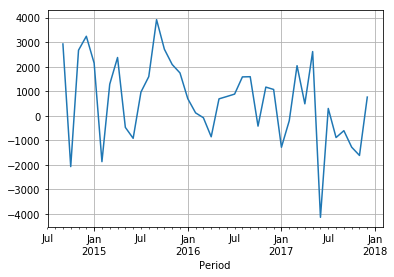

In [45]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas_datareader import data, wb

apple = data.DataReader("AAPL", "yahoo")
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
#pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
#apple["Adj Close"].plot(grid = True) # Plot the adjusted closing price of AAP
df.sort_index(inplace=True)
df['Net Profit'] = pd.to_numeric(df["Net Profit"])
df['Net Profit'].plot(grid = True)

# An "interface" to matplotlib.axes.Axes.hist() method
#import numpy as np
#d = df['Net Profit']
#df.plot()
#import matplotlib.pyplot as plt
#fig, ax = plt.subplots()
#df['Net Profit'].plot(grid=True)
#ax.xaxis_date()
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#df.index


In [51]:
stock_return = df['Net Profit']
#stock_return.apply(lambda x: x / x[0])
stock_return = df['Net Profit'] / df['Net Profit'][0]
stock_return.head()

Period
2014-09-01    1.000000
2014-10-01   -0.708519
2014-11-01    0.913103
2014-12-01    1.107424
2015-01-01    0.733151
Name: Net Profit, dtype: float64

In [52]:
df.head()

,Period,Net Profit,% Gain,Profit Factor,# Trades,%Profitable
Period,,,,,,
2014-09-01,2014-09-01 00:00:00,2923,0.0222,3.23,9,0.5556
2014-10-01,2014-10-01 00:00:00,-2071,-0.0154,0.37,7,0.2857
2014-11-01,2014-11-01 00:00:00,2669,0.0201,3.62,7,0.5714
2014-12-01,2014-12-01 00:00:00,3237,0.0239,2.53,11,0.6364
2015-01-01,2015-01-01 00:00:00,2143,0.0155,3.8,9,0.7778


In [23]:
df['Net Profit']

Period
2017-12-01 00:00:00      760
2017-11-01 00:00:00    -1617
2017-10-01 00:00:00    -1280
2017-09-01 00:00:00     -608
2017-08-01 00:00:00     -888
2017-07-01 00:00:00      297
2017-06-01 00:00:00    -4137
2017-05-01 00:00:00     2614
2017-04-01 00:00:00      486
2017-03-01 00:00:00     2039
2017-02-01 00:00:00     -204
2017-01-01 00:00:00    -1284
2016-12-01 00:00:00     1070
2016-11-01 00:00:00     1167
2016-10-01 00:00:00     -423
2016-09-01 00:00:00     1590
2016-08-01 00:00:00     1582
2016-07-01 00:00:00      882
2016-06-01 00:00:00      783
2016-05-01 00:00:00      688
2016-04-01 00:00:00     -857
2016-03-01 00:00:00      -81
2016-02-01 00:00:00      117
2016-01-01 00:00:00      695
2015-12-01 00:00:00     1743
2015-11-01 00:00:00     2087
2015-10-01 00:00:00     2710
2015-09-01 00:00:00     3914
2015-08-01 00:00:00     1593
2015-07-01 00:00:00      965
2015-06-01 00:00:00     -920
2015-05-01 00:00:00     -474
2015-04-01 00:00:00     2372
2015-03-01 00:00:00     1286
2015-02

In [74]:

def parseXls(tn,wb_file):
    

    #wb_file = f'{ws_dir}/{testNum}.xlsx'
    wb = load_workbook(filename=wb_file, read_only=True)
    
    sql_updates = parse_performance_summary(wb)
    parse_trades_list(wb)
    
        
    wb.close()
    #print(f'sql updates: {sql_updates}')
    return(sql_updates)

In [ ]:
def dbConnect():
    db = Session()
    db_url = os.environ['DB_HEROKU']

    engine = create_engine(db_url)
    Base.metadata.bind = engine

    DBSession = sessionmaker(bind=engine)
    session = DBSession()
    return session

In [ ]:
def updateDb(dbh,testNum,updates):
    #print(f'{testNum}:  {updates}')
    try:
      dbh.query(OosTest).filter(OosTest.id == testNum).update(updates)
      dbh.commit()
    except:
      print("ROLLBACK")
      dbh.rollback()
      raise


In [ ]:
for tn in range(1,5):
    fn = f'{ws_dir}/{tn}.xlsx'
    db_updates = parseXls(fn)
    print(f'{tn}: {db_updates}')
    dbh =dbConnect()
    updateDb(dbh,tn,db_updates)

In [ ]:
#directory = os.fsencode(ws_dir)

dbh =dbConnect()
for fn in os.listdir(ws_dir):
    if fn == '1.xlsx':
    #if fn.endswith(".xlsx"):
        file = ws_dir+'/'+fn
        tn = fn.split('.')[0]
        db_updates = parseXls(tn,file)
        print(tn.rjust(3), end =" ")
        #print(f'{tn}: {db_updates}')
        if db_updates:
            updateDb(dbh,tn,db_updates)
        continue
    else:
        continue

In [ ]:
def writeTrades(wb_file):
    wb = load_workbook(filename=wb_file, read_only=True)
    ws = wb['Trades List']

    for row in ws.rows:
        print([cell.value for cell in row])
        #c.writerow([cell.value for cell in row])

        '''
        with open('test.csv', 'wb') as f:  # open('test.csv', 'w', newline="") for python 3
            c = csv.writer(f)
            for r in ws.rows:
                c.writerow([cell.value for cell in r])
        '''
        '''

        try:
            k = row[0].value  #.title
        except AttributeError:
            continue
        if k is None: continue
        k = k.replace(" ","")
        k = k.replace(".","")
        k = k.replace(":","")
        if k.replace(" ","") == "": continue
        if k == 'AllTrades': break
        
        #print(f'{k}')
        if k in db_fields:
            sql_updates[k] = row[1].value
        '''

    wb.close()
    #print(f'sql updates: {sql_updates}')
    return(sql_updates)

file_path = f'{ws_dir}/{35}.xlsx'
writeTrades(file_path)

In [ ]:
def writeTrades2csv(tn,wb_file):
    wb = load_workbook(filename=wb_file)

    sheet = wb['Trades List']
    fn = f'test_{tn}'
    with open(msa_dir + fn +'.csv', 'w') as f:
        c = csv.writer(f)
        for row in sheet.rows:
            #print([cell.value for cell in row])
            c.writerow([cell.value for cell in row])

    #f.close()
    
'''
tn = 35
file_path = f'{ws_dir}/{tn}.xlsx'
print(file_path)
if os.path.exists(file_path):
    writeTrades2csv(tn,file_path)
'''

In [1]:
import sys
sys.executable

'/Users/szagar/anaconda3/envs/nb_env/bin/python'

In [2]:
sys.path

['',
 '/Users/szagar/ZTS/Dropbox/Business/ats/Code/Notebooks',
 '/Users/szagar/anaconda3/envs/nb_env/lib/python37.zip',
 '/Users/szagar/anaconda3/envs/nb_env/lib/python3.7',
 '/Users/szagar/anaconda3/envs/nb_env/lib/python3.7/lib-dynload',
 '/Users/szagar/anaconda3/envs/nb_env/lib/python3.7/site-packages',
 '/Users/szagar/anaconda3/envs/nb_env/lib/python3.7/site-packages/IPython/extensions',
 '/Users/szagar/.ipython']

In [ ]:
dbSession = dbConnect()
for tn in range(1,129):
    file_path = f'{ws_dir}/{tn}.xlsx'
    if os.path.exists(file_path):
        #updateDb(dbSession,tn, parseXls(file_path))
        writeTrades2csv(tn,file_path)

# Appendix

SHARPE RATIO
Nobel Laureate William Sharpe introduced the Sharpe Ratio, in 1966, under the
name reward-to-variability ratio. This ratio is perhaps the best known of the
return to risk measures. The formula for the Sharpe ratio is

SR = (µ – I) / σ,

where µ is the average monthly return for the period in consideration, I is the risk
free rate of return, σ is the standard deviation of monthly returns.
Thus, this formula yields a value that could be loosely defined as return per unit
risked if we accept the premise that variability is risk. The higher Sharpe ratio the
smoother the equity curve on a monthly basis. Having a smooth equity curve is a
very important objective for many traders. That is why this ratio is widely used
both at an individual market and at a portfolio level. Schwager and other authors
have noted that risk might be more accurately defined as downside variability of
returns which has led to the introduction of some alternative measures. The
Sharpe ratio remains, however, one of the main measures for evaluating the
performance of professional portfolio managers.

*RETURN RETRACEMENT RATIO*
Jack Schwager created the Return Retracement Ratio as another reward to risk
measure. A major distinction between this measure and the Sharpe ratio is the
use of equity retracement versus variability of returns as a measure of risk. The
Return Retracement Ratio places more emphasis on downside volatility.
Specifically, this ratio is the average annualized compounded return divided by an
average maximum retracement measure.
For the detailed calculation of the Return Retracement Ratio see Appendix A

K - RATIO
Lars Kestner created a ratio that gauges performance by examining the
consistency of returns with respect to time. Calculations for return and risk are
derived from VAMI (value added monthly index). VAMI is a monthly plot of the
progress of a hypothetical $1000 initial investment.
For the detailed calculation of K - Ratio see Appendix B.
Because the consistency of returns is examined with respect to time, the K – ratio
provides a good evaluation of equity performance.

RINA INDEX
The previous three ratios are equity performance measures. RINA Systems has
developed a new ratio, called RINA Index, that is a trade performance measure.
The RINA Index is calculated by taking the net profit without trades that are
outside of 3 sigma from the average trade weighted by the average drawdown
and by the percent time in the market.
RINA Index = (Net Profit – Net Profit in Outliers)/(Average Drawdown*Percent
Time in the Market).
The index is a good substitute for the ratio Net Profit/ Maximum Drawdown. It
gives more realistic reward/risk value for a trading performance. In addition to
drawdown as an element of risk in the measurement of performance, time-in-themarket
is included as another element of risk. The premise is that there is an
inherent risk any time a position is established. Following this logic, the RINA
Index would be higher (all other variables equal) for a system that spends less
time in the market. Generally, a system with a RINA Index of 30 or higher could
be considered to have a reasonably good performance.
Using the RINA Index traders get a performance measure independent of the
return on equity and initial capital. The RINA Index will not change whether you
select fifty thousand or one hundred thousand dollars as your initial capital to
trade a strategy. It will, however, change with the price of the underlying moving
up or down during the trade. The Sharpe Ratio, for instance, is dependent on the
capital in the account upon which monthly returns are calculated. The RINA
Index is one of the few ways to measure the quality of the trades themselves,
which are generated by a trading system.
Another main difference between the RINA Index and some of the other
measures of trading performance is that the RINA defines risk as time in the
market and average drawdown. The RINA Index will be biased against a system
that has outlier trades. A good example of this is a long-term trend following
strategy applied to several markets that attempts to catch the “fat tails” of price
distributions.
With the addition of these performance measures to TradeStation 2000i traders
have a greatly expanded capability to compare the results of various systems.

Return Retracement Ratio Calculation.
Return Retracement Ratio (RRR) represents the average annualized
compounded return (R) divided by an average maximum retracement (AMR)
measure:
RRR=R/AMR
AMR=1/n *∑=
n
i
MRi
1
,
Where n=number of months in survey period.
MRi = max (MRPPi, MRSLi),
Where
MRPPi=(PEi – Ei)/PEi,
MRSLi=(Ei – MEi)/Ei,
Where Ei = equity at the end of the month i,
PEi = peak month-end equity on or prior to month i,
MEi = minimum month-end equity on or subsequent to month i.
R is the average annual compounded return equals to
R= N / SE - 1,
Where S is starting equity, E is ending equity, N is the number of years.
For more information please refer to Jack Schwager book Managed Trading.
Myths and Tactics.